# ML Workflow - Supervised Learning (Classification)

![Image](./img/scikit_learn.png)


In [2]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

---

## The Classification Problem

- One-Class Classification

- Multiclass Classification

- Multilabel Classification (also known as Multioutput Classification, but not exactly the same)

- Multitask Classification (also known as Multiclass-multioutput classification)

![Image](./img/classification_problem.png)

---

## One-Class Classification

- [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

- [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [3]:
#Load toy dataset

cancer = datasets.load_breast_cancer(as_frame=True)
description = cancer.DESCR

cancer = cancer['data'].merge(cancer['target'], left_index=True, right_index=True)
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
print(description)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# Load synthetic dataset

X, y = datasets.load_breast_cancer(return_X_y=True)
#X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
print(X.shape, y.shape)

(569, 30) (569,)


In [6]:
# Train and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

X_train: (455, 30), X_test: (114, 30), y_train: (455,), y_test: (114,)
X_train: <class 'numpy.ndarray'>, X_test: <class 'numpy.ndarray'>, y_train: <class 'numpy.ndarray'>, y_test: <class 'numpy.ndarray'>


In [7]:
%%time

# Model definition

model = SGDClassifier()
#model = SVC()
#model = DecisionTreeClassifier()

hyperparameters = model.get_params()

print(type(model), '\n')
print('Model hyperparameters:', hyperparameters, '\n')

<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 

Model hyperparameters: {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 

Wall time: 11 ms


In [8]:
%%time

# Model training

model.fit(X_train, y_train)

print('Model:', model, '\n')
print('Model hyperparameters:', hyperparameters, '\n')

Model: SGDClassifier() 

Model hyperparameters: {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 

Wall time: 267 ms


In [9]:
%%time

# Model predictions

predictions = model.predict(X_test)

print(type(predictions))

<class 'numpy.ndarray'>
Wall time: 3.06 ms


In [10]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [11]:
# Visual check

check = pd.DataFrame({'Ground truth':y_test, 'Predictions':predictions, 'Diff':y_test-predictions})
check.tail(20)

,Ground truth,Predictions,Diff
94,1,1,0
95,1,1,0
96,0,0,0
97,0,0,0
98,1,1,0
99,0,0,0
100,0,0,0
101,1,1,0
102,0,0,0
103,0,0,0


__Accuracy__

In [12]:
model.score(X_test, y_test)

0.9649122807017544

In [13]:
accuracy_score(y_test, predictions)

0.9649122807017544

In [14]:
accuracy_score(y_test, predictions, normalize=False)

110

---

### Classification Metrics Definitions

![Image](./img/confusion_matrix_.JPG)

- TP = True Positives (predict 1 when 1)

- TN = True Negatives (predict 0 when 0)

- FP = False Positives (predict 1 when 0)

- FN = False Negatives (predict 0 when 1)

---


![Image](./img/precision_recall_f1.jpg)

- Accuracy = (TP+TN)/(TP+TN+FP+FN)

- Precision = TP/(TP+FP)

- Recall = TP/(TP+FN)

- F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [15]:
# Precision

precision_score(y_test, predictions)

0.9466666666666667

In [16]:
# Recall

recall_score(y_test, predictions)

1.0

__F-Score__ is the [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) between Precision and Recall

In [17]:
f1_score(y_test, predictions)

0.9726027397260273

__Confusion Matrix__

In [18]:
confusion_matrix(y_test, predictions)

array([[39,  4],
       [ 0, 71]], dtype=int64)

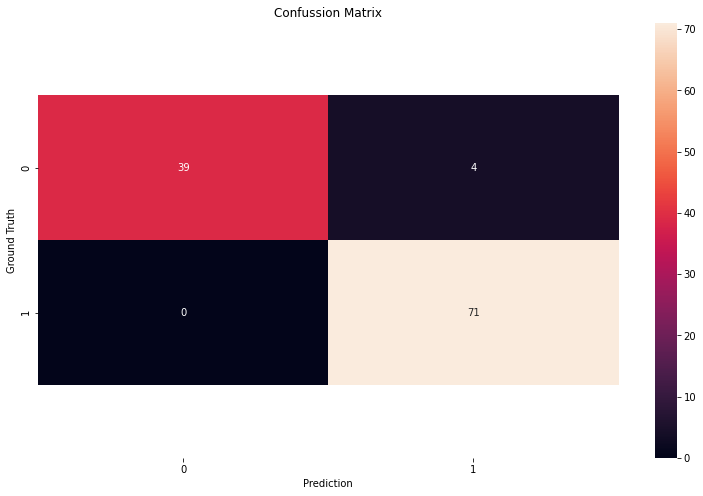

In [19]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13,8))
ax = sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
b, t = ax.get_ylim()
ax.set_ylim(b + 0.5, t - 0.5)
plt.title('Confussion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show();

__Receiver Operating Characteristics Curve__

It tells how much the model is capable of distinguishing between classes.

![Image](./img/roc_curve.JPG)


- __TPR__ = True Positive Rate = __TP/(TP+FN)__

- Specificity = TN/(TN+FP)

- __FPR__ = False Positive Rate = 1 - Specificity = __FP/(FP+TN)__

In [20]:
# Area under the curve (AUC)

roc_auc_score(y_test, predictions)

0.9534883720930233

__ROC Curve Interpretation__

The ROC is a curve of probability, therefore we can use the distributions of those probabilities to interpret the meaning of it.


__Perfect Classifier:__

![Image](./img/roc_01.JPG)

__Real World Classifier:__

![Image](./img/roc_02.JPG)

__Random Classifier:__

![Image](./img/roc_03.JPG)

__Reciprocating the classes:__

![Image](./img/roc_04.JPG)

---